In [157]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [158]:
sales = pd.read_csv('kc_house_data.csv', parse_dates = ['date'])

In [159]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [160]:
###Exploring the data of our housing sales

C:\Users\sadaouih\AppData\Local\Continuum\anaconda3\envs\dscience-env\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


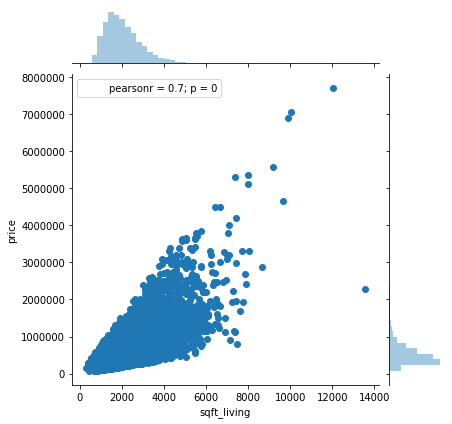

In [161]:
sns.jointplot(x="sqft_living",y="price",data = sales)

In [162]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [163]:
#sns.pairplot(sales, palette="district")

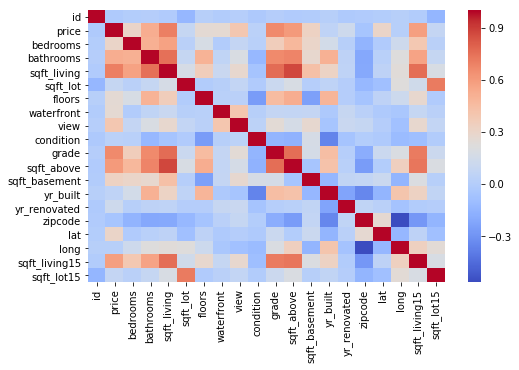

In [164]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(sales.corr(), cmap = "coolwarm")

C:\Users\sadaouih\AppData\Local\Continuum\anaconda3\envs\dscience-env\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


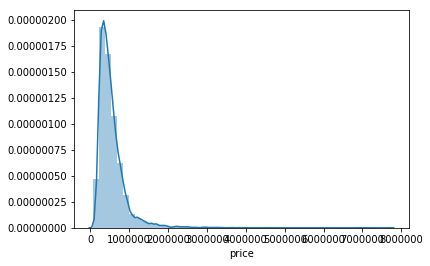

In [165]:
sns.distplot(sales['price'])

In [166]:
X = sales[['sqft_living']]#,'grade']]
y = sales['price']

In [167]:
type(X)

pandas.core.frame.DataFrame

In [168]:
from sklearn.cross_validation import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [170]:
print(X_train.shape,X_test.shape)

(16209, 1) (5404, 1)


In [171]:
#Create a simple regression model of  sqft_living to price
from sklearn.linear_model import LinearRegression

In [172]:
##Build the regression model
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

-38096.6645053
             Coefficient
sqft_living   278.199155


In [174]:
#Evaluate the simple model

In [175]:
print(y_test.mean())

540873.5660621761


In [176]:
predictions = lm.predict(X_test)
predictions

array([ 254012.44782374,  529429.61087688,  657401.22199247, ...,
        918908.42731565,  399232.40652449,  774244.8669241 ])

In [177]:
from sklearn import metrics

In [178]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 172499.563879
MSE: 68254439925.5
RMSE: 261255.506976


In [179]:
#Let's show what our predictions look like

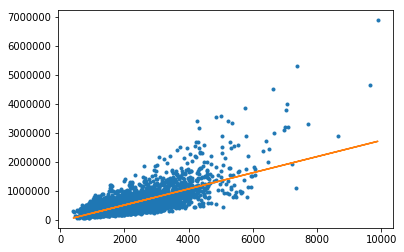

In [180]:
plt.plot(X_test,y_test,'.', X_test,predictions,'-')

In [181]:
#Explore other features in the data

In [182]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [183]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [184]:
sales[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


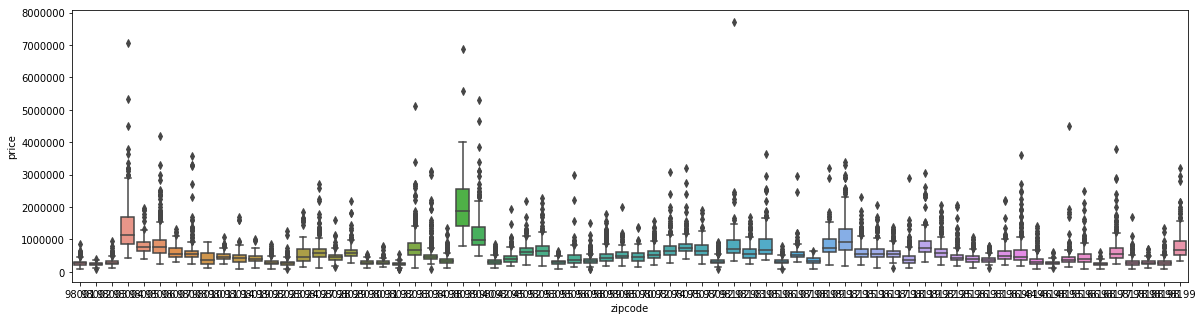

In [185]:
fig = plt.figure(figsize=(20,5))
sns.boxplot(x='zipcode',y='price', data= sales)

In [186]:
X = sales[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [187]:
#Build a regression with more features

In [188]:
lm2 = LinearRegression()
lm2.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
predictions2 = lm2.predict(X_test)
predictions2

array([ 258327.96746119,  522293.00649936,  678205.39085712, ...,
        952108.74989116,  415787.88955548,  866904.58930004])

In [190]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 172499.563879
MSE: 68254439925.5
RMSE: 261255.506976


In [191]:
#Apply learn models to predict prices of 3 houses

In [192]:
house1=sales[sales['id']==5309101200]

In [193]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,2014-06-05,620000.0,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [194]:
#<img src="house-5309101200.jpg">

In [195]:
print(house1['price'])

1054    620000.0
Name: price, dtype: float64


In [202]:
print(lm2.predict(house1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']]))

[ 629091.33474498]


In [198]:
#Prediction for a second, fancier house

In [199]:
house2=sales[sales['id']==1925069082]

In [200]:
print(house2['price'])

1361    2200000.0
Name: price, dtype: float64


In [201]:
print(lm2.predict(house2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']]))

[ 1254621.77396227]


In [203]:
## Last house, super fancier

In [205]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [206]:
#%%---------------------------------- Exercice -----------------------------%%
#Select some statistics
sales[sales['id']==2414600126]
s1=sales[sales['zipcode']==98146]
print(s1['price'].mean())

359483.2395833333


In [207]:
s1.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
160,84000105,2014-05-07,255000.0,5,2.25,2060,8632,1.0,0,0,...,7,1030,1030,1962,0,98146,47.4877,-122.335,1010,11680
217,1909600046,2014-07-03,445838.0,3,2.50,2250,5692,2.0,0,0,...,8,2250,0,2000,0,98146,47.5133,-122.379,1320,5390


In [208]:
#filtering data 'take somme house'
house_3=sales[(sales['sqft_living']>2000)&(sales['sqft_living']<4000)]

In [209]:
print(sales.shape)

(21613, 21)


In [210]:
print(house_3.shape)

(9111, 21)


In [212]:
print(9111.0/21613.0)

0.4215518437977143


In [153]:
#build a regression model

In [213]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [214]:
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [218]:
#Training and test data
X = sales[advanced_features]
y = sales['price']
#train_data3,test_data3=house_3.random_split(.8,seed=0)

In [221]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)

In [225]:
print(X_train3.shape)
print(X_test3.shape)

(16209, 18)
(5404, 18)


In [226]:
lm3 = LinearRegression()

In [227]:
lm3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [228]:
predictions3 = lm3.predict(X_test3)

In [229]:
print('MAE : ', metrics.mean_absolute_error(y_test3,predictions))
print('MSE : ', metrics.mean_squared_error(y_test3,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test3,predictions)))

MAE :  309916.585886
MSE :  216215172018.0
RMSE:  464989.432157


In [263]:
h1=sales[sales['id']==2487200875]
h1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [268]:
house1['price']

1361    2200000.0
Name: price, dtype: float64

In [266]:
print(lm2.predict(house1[my_features]))
print(lm3.predict(house1[advanced_features]))

[ 629091.33474498]
[ 669676.85154352]


In [138]:
#Difference between a last and the new model
print advanced_features_model.evaluate(test_data)
print my_features_models.evaluate(test_data)

{'max_error': 3942752.926872163, 'rmse': 164380.51337426493}
{'max_error': 3492860.721208521, 'rmse': 179621.18730537395}


In [139]:
print 179621.18730537395-164380.51337426493

15240.6739311
